In [275]:
#conda activate Geospatial (in terminal)
import requests
import pandas as pd
from io import StringIO
import json 
import csv 
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

In [276]:
# capture data within the tn boarders with longitude and latitude and convert to csv and start the time from 1900 to now
url = 'https://opendata.arcgis.com/datasets/592082987bd5456baab74d70f1bf5d90_0.geojson'

In [277]:
#getting API url and building df
r = requests.get(url)
tn_counties = gpd.read_file(url)

In [278]:
# cleaning to just needed columns
tn_counties['county'] = tn_counties['NAMELSAD']
tn_counties = tn_counties[['county','Population','geometry']]

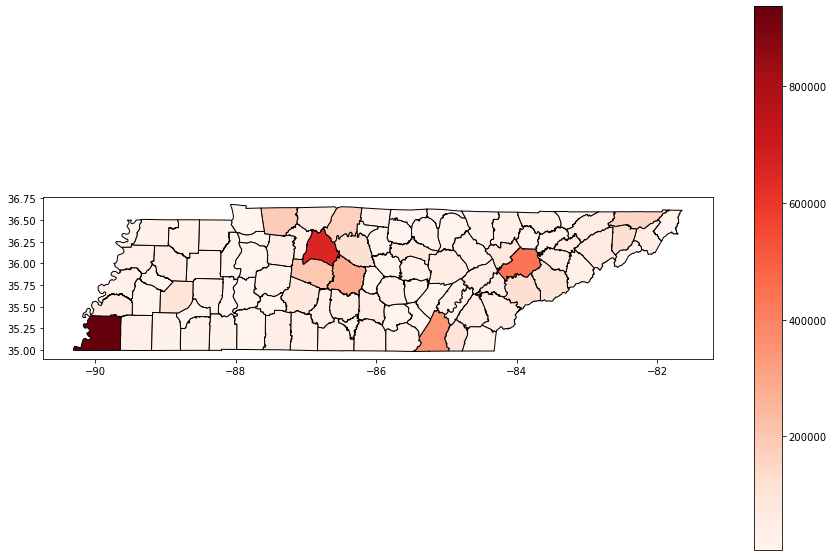

In [279]:
#creating map of population in TN
tn_counties.plot(column = 'Population', figsize=(15, 10),
              edgecolor = 'black',legend = True, cmap = 'Reds')
plt.show()

In [280]:
#bring in geometry of big quakes
outside_tn_quake_df = pd.read_csv('../data/cleaned_outside_tn_earthquake_data.csv')

#subsetting for quakes larger than 3.8 magnitude
big_quakes = outside_tn_quake_df[outside_tn_quake_df['mag']>3.8]

# getting rid of quakes too far from tn border
big_quakes = big_quakes[big_quakes['Unnamed: 0'].isin([10204, 10228, 10229, 10209, 335, 6013]) == False]

#sorting quakes df by magnitude
big_quakes = big_quakes.sort_values(by = 'mag')

In [281]:
#creating a geometry column
big_quakes['geometry'] = big_quakes.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis = 1)

In [282]:
#creating a GeoDataFrame
big_quakes = gpd.GeoDataFrame(big_quakes, geometry = big_quakes['geometry'])

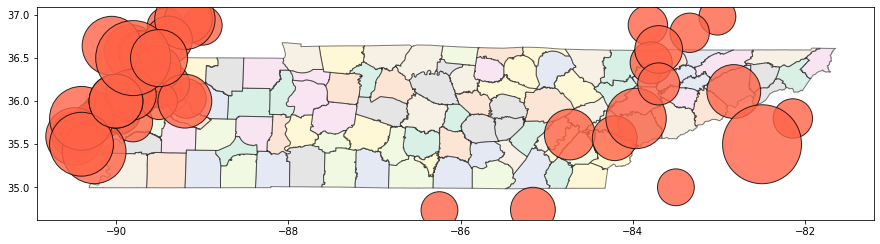

In [283]:
#test
ax = tn_counties['geometry'].plot(figsize = (15,10), edgecolor = 'black', cmap = 'Pastel2', alpha = 0.5)
big_quakes['geometry'].plot(ax = ax, markersize = big_quakes['mag'] ** 5.3, color = 'tomato', alpha = 0.8, edgecolor = 'black')
plt.show();

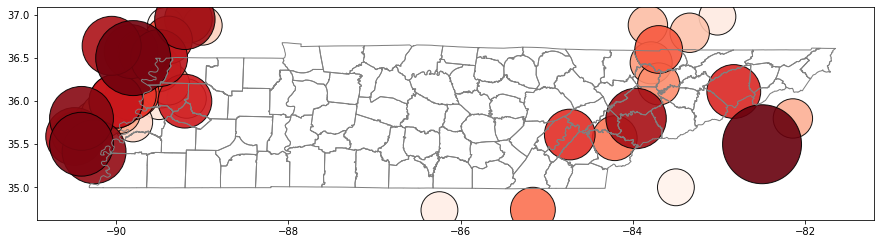

In [286]:
#Plotting Earthquakes on TN Counties (Circles sized and colored by magnitude)
ax = tn_counties['geometry'].boundary.plot(figsize = (15,10), color = 'Gray', linewidth=1)
big_quakes['geometry'].plot(ax = ax, markersize = big_quakes['mag'] ** 5.3, cmap = 'Reds', alpha = 0.9, edgecolor = 'black')
plt.show();

### Distance from epicenter = sqrt((lat-(lat+radius))^2 + (long-(long+radius))^2)
### Use distance to find points to build a polygon (circle)

import plotly.express as px

fig = px.choropleth(tn_counties, geojson = 'geometry', locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()